# Proyecto de predicción con regresión del dataset Global Super Store

## Introducción
Este proyecto se centra en el análisis y predicción de beneficios utilizando técnicas de regresión sobre el dataset Global Super Store. El objetivo principal es desarrollar modelos predictivos que nos ayuden a entender los factores que influyen en el beneficio (Profit) de la tienda.

## Dataset
El dataset Global Super Store contiene información detallada sobre ventas, envíos, productos y clientes de una tienda global. Incluye variables como fechas de pedido y envío, información del cliente, detalles del producto, ventas, descuentos y beneficios.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
# --- Preprocesamiento y División ---
from sklearn.model_selection import train_test_split, GridSearchCV
# --- Métricas de Evaluación ---
from sklearn.metrics import r2_score, mean_squared_error

# --- Modelos de Regresión Lineal ---
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# --- Modelos Basados en Árboles ---
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Configuración de visualización
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

# Carga del dataset
df = pd.read_csv('data/Global_Superstore2.csv', encoding='iso-8859-1')

# Mostrar las primeras 10 filas del dataset
print("Dimensiones del dataset:", df.shape)
df.head(10)

Dimensiones del dataset: (51290, 24)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,United States,10024.0,US,East,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,NaN,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,NaN,APAC,Oceania,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,Germany,NaN,EU,Central,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,Senegal,NaN,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical
5,22732,IN-2013-42360,28-06-2013,01-07-2013,Second Class,JM-15655,Jim Mitchum,Corporate,Sydney,New South Wales,Australia,NaN,APAC,Oceania,TEC-PH-10000030,Technology,Phones,"Samsung Smart Phone, with Caller ID",2862.675,5,0.1,763.2750,897.35,Critical
6,30570,IN-2011-81826,07-11-2011,09-11-2011,First Class,TS-21340,Toby Swindell,Consumer,Porirua,Wellington,New Zealand,NaN,APAC,Oceania,FUR-CH-10004050,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",1822.080,4,0.0,564.8400,894.77,Critical
7,31192,IN-2012-86369,14-04-2012,18-04-2012,Standard Class,MB-18085,Mick Brown,Consumer,Hamilton,Waikato,New Zealand,NaN,APAC,Oceania,FUR-TA-10002958,Furniture,Tables,"Chromcraft Conference Table, Fully Assembled",5244.840,6,0.0,996.4800,878.38,High
8,40155,CA-2014-135909,14-10-2014,21-10-2014,Standard Class,JW-15220,Jane Waco,Corporate,Sacramento,California,United States,95823.0,US,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,5083.960,5,0.2,1906.4850,867.69,Low
9,40936,CA-2012-116638,28-01-2012,31-01-2012,Second Class,JH-15985,Joseph Holt,Consumer,Concord,North Carolina,United States,28027.0,US,South,FUR-TA-10000198,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,4297.644,13,0.4,-1862.3124,865.74,Critical


## Análisis Exploratorio de Datos (EDA)

### Análisis Inicial
Comenzaremos con un análisis exploratorio para entender mejor nuestros datos. Primero, examinaremos:
1. Tipos de datos y valores faltantes
2. Estadísticas descriptivas básicas
3. Distribución de variables numéricas clave

In [4]:
# Información general del dataset
print("Información del dataset:")
print(df.info())

print("\nEstadísticas descriptivas de las variables numéricas:")
print(df.describe())

print("\n--- Cuántos datos nulos hay ---")
print(df.isnull().sum())

print("\n--- Cuántos duplicados hay ---")
print(df.duplicated().sum())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Produc

In [5]:
# Convertir fechas (necesario para el cálculo)
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
df['Ship Date'] = pd.to_datetime(df['Ship Date'], dayfirst=True)

# Crear la nueva columna
df['Days_to_Ship'] = (df['Ship Date'] - df['Order Date']).dt.days

# Esta es la lista de columnas que quieres usar
columnas_seleccionadas = [
    'Profit', 
    'Sales', 
    'Quantity', 
    'Discount', 
    'Shipping Cost',
    'Days_to_Ship',
    'Ship Mode',
    'Country',
    'Product Name',
    'Category',
    'Sub-Category',
    'Order Priority'
]

# Categóricas "seguras" (pocas opciones, buenas para get_dummies)
categoricas_safe = [
    'Ship Mode',
    'Category',
    'Sub-Category',
    'Country',
    'Order Priority'
]

# Categóricas "problemáticas" (miles de opciones, causan MemoryError)
categoricas_problematicas = [
    'Product Name'
]

## Ingeniería de Características

Basándonos en el análisis exploratorio, realizaremos las siguientes transformaciones:

1. Procesamiento de fechas:
   - Crear variable de tiempo de envío
   - Extraer mes y año de la fecha de orden

2. Codificación de variables categóricas:
   - One-hot encoding para Category, Sub-Category, Ship Mode
   - Label encoding para variables con alta cardinalidad como Customer ID

3. Eliminación de columnas redundantes o no informativas

In [6]:
# Filtramos el dataframe para quedarnos SÓLO con estas columnas
# Nos aseguramos de que las columnas existan en df_temp
columnas_a_usar = [col for col in columnas_seleccionadas if col in df.columns]
df_limpio = df[columnas_a_usar]

# AVISO: Eliminamos las columnas problemáticas para evitar el MemoryError.
# Un modelo no puede manejar 40,000+ columnas de 'Product Name'.
print(f"--- Aviso: Eliminando {categoricas_problematicas} por alta cardinalidad ---")
df_procesado = df_limpio.drop(columns=categoricas_problematicas, errors='ignore')

# Identificamos las categóricas 'safe' que SÍ están en el dataframe
categoricas_a_codificar = [col for col in categoricas_safe if col in df_procesado.columns]

# 5. Aplicamos get_dummies SOLAMENTE a las columnas seguras
df_encoded = pd.get_dummies(df_procesado, columns=categoricas_a_codificar, drop_first=True)

print("\n--- Columnas después de la codificación (listas para el modelo) ---")
print(df_encoded.columns)

--- Aviso: Eliminando ['Product Name'] por alta cardinalidad ---

--- Columnas después de la codificación (listas para el modelo) ---
Index(['Profit', 'Sales', 'Quantity', 'Discount', 'Shipping Cost',
       'Days_to_Ship', 'Ship Mode_Same Day', 'Ship Mode_Second Class',
       'Ship Mode_Standard Class', 'Category_Office Supplies',
       ...
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Venezuela',
       'Country_Vietnam', 'Country_Yemen', 'Country_Zambia',
       'Country_Zimbabwe', 'Order Priority_High', 'Order Priority_Low',
       'Order Priority_Medium'],
      dtype='object', length=176)


### Análisis de Correlación entre Variables Relevantes

Analizaremos las variables más importantes para nuestro modelo:
1. Profit (variable objetivo)
2. Sales
3. Discount
4. Category

También examinaremos las correlaciones entre estas variables.

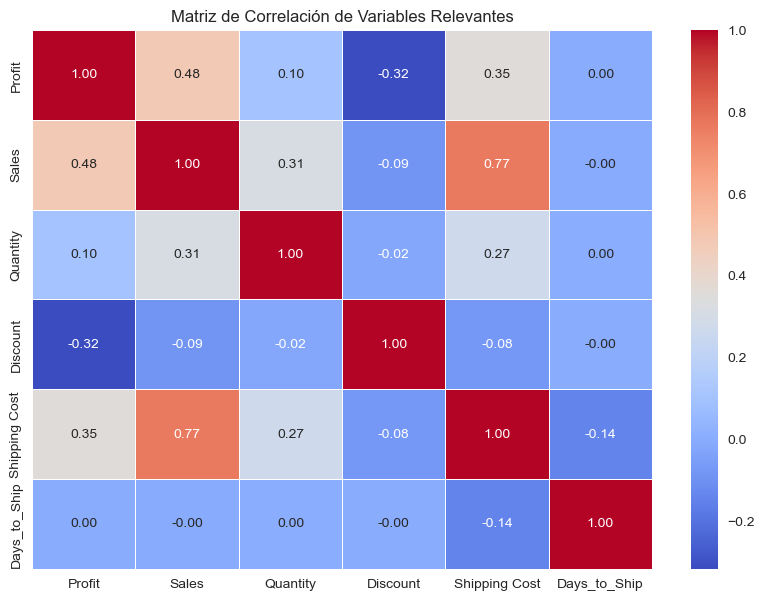

In [7]:
# Análisis de la variable objetivo (Profit)
df_corr = df_encoded.copy()

# Seleccionamos las columnas numéricas relevantes
columnas_numericas = [
    'Profit', 
    'Sales', 
    'Quantity', 
    'Discount', 
    'Shipping Cost',
    'Days_to_Ship'
]

df_final_corr = df_corr[columnas_numericas]

# Calculamos la matriz de correlación
corr_matrix = df_final_corr.corr()

# Graficamos el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr_matrix, 
    annot=True,      # Muestra los números (coeficientes) en cada celda
    fmt='.2f',       # Formatea los números a 2 decimales
    cmap='coolwarm',
    linewidths=0.5
)
plt.title('Matriz de Correlación de Variables Relevantes')
plt.show()

In [8]:
X = df_encoded.drop('Profit', axis=1)
y = df_encoded['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Guardar los conjuntos de datos
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

## Fase 1: Análisis de Línea Base (Modelos Lineales)

En esta fase implementaremos tres modelos de regresión:
1. Regresión Lineal Simple
2. Ridge (L2)
3. Lasso (L1)

Evaluaremos su rendimiento utilizando las métricas R² y RMSE, y analizaremos la importancia de las variables en la predicción.

In [9]:
# Cargar datos preprocesados
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

# Convertir y_train y y_test de DataFrame a Series
y_train = y_train.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# Función para evaluar modelos
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    print(f"\nResultados para {model_name}:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.2f}")
    return r2, rmse

### 1. Regresión Lineal Simple

Comenzamos con un modelo de regresión lineal simple como línea base para nuestras predicciones.

In [10]:
# Entrenar modelo de regresión lineal
lr_model = LinearRegression()
inicio = time.time()
lr_model.fit(X_train, y_train)
fin = time.time()
lr_time = fin - inicio
print("Tiempo LinearRegression:")
print(f"{lr_time:.2f}")
# Predicciones
lr_train_pred = lr_model.predict(X_train)
lr_test_pred = lr_model.predict(X_test)

# Evaluar modelo
print("Evaluación del modelo de Regresión Lineal:")
lr_train_r2, lr_train_rmse = evaluate_model(y_train, lr_train_pred, "Regresión Lineal (train)")
lr_test_r2, lr_test_rmse = evaluate_model(y_test, lr_test_pred, "Regresión Lineal (test)")

Tiempo LinearRegression:
0.20
Evaluación del modelo de Regresión Lineal:

Resultados para Regresión Lineal (train):
R² Score: 0.3641
RMSE: 139.36

Resultados para Regresión Lineal (test):
R² Score: 0.2646
RMSE: 148.04


### 2. Regularización Ridge (L2)

Implementaremos Ridge con búsqueda de hiperparámetros usando GridSearchCV para encontrar el mejor valor de alpha.

In [11]:
# Definir parámetros para búsqueda
alphas = np.logspace(-3, 1, 10)
param_grid = {'alpha': alphas}

# Crear y ajustar GridSearchCV
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
inicio = time.time()
grid_ridge.fit(X_train, y_train)
fin = time.time()
ridge_time = fin - inicio
print("Tiempo Ridge:")
print(f"{ridge_time:.2f}")

# Mejor modelo Ridge
best_ridge = grid_ridge.best_estimator_
print(f"Mejor valor de alpha para Ridge: {grid_ridge.best_params_['alpha']:.6f}")

# Predicciones con el mejor modelo Ridge
ridge_train_pred = best_ridge.predict(X_train)
ridge_test_pred = best_ridge.predict(X_test)

# Evaluar modelo
print("\nEvaluación del modelo Ridge:")
ridge_train_r2, ridge_train_rmse = evaluate_model(y_train, ridge_train_pred, "Ridge (Train)")
ridge_test_r2, ridge_test_rmse = evaluate_model(y_test, ridge_test_pred, "Ridge (Test)")

Tiempo Ridge:
4.04
Mejor valor de alpha para Ridge: 10.000000

Evaluación del modelo Ridge:

Resultados para Ridge (Train):
R² Score: 0.3639
RMSE: 139.38

Resultados para Ridge (Test):
R² Score: 0.2647
RMSE: 148.03


### 3. Regularización Lasso (L1)

Implementaremos Lasso con búsqueda de hiperparámetros. Este modelo nos ayudará a identificar las variables más importantes, ya que puede reducir coeficientes a cero.

In [12]:
# Crear y ajustar GridSearchCV para Lasso
lasso = Lasso(max_iter=50000)
grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
inicio= time.time()
grid_lasso.fit(X_train, y_train)
fin = time.time()
lasso_time = fin - inicio
print("Tiempo Lasso:")
print(f"{lasso_time:.2f}")

# Mejor modelo Lasso
best_lasso = grid_lasso.best_estimator_
print(f"Mejor valor de alpha para Lasso: {grid_lasso.best_params_['alpha']:.6f}")

# Predicciones con el mejor modelo Lasso
lasso_train_pred = best_lasso.predict(X_train)
lasso_test_pred = best_lasso.predict(X_test)

# Evaluar modelo
print("\nEvaluación del modelo Lasso:")
lasso_train_r2, lasso_train_rmse = evaluate_model(y_train, lasso_train_pred, "Lasso (Train)")
lasso_test_r2, lasso_test_rmse = evaluate_model(y_test, lasso_test_pred, "Lasso (Test)")

Tiempo Lasso:
260.06
Mejor valor de alpha para Lasso: 0.021544

Evaluación del modelo Lasso:

Resultados para Lasso (Train):
R² Score: 0.3634
RMSE: 139.44

Resultados para Lasso (Test):
R² Score: 0.2642
RMSE: 148.08


### Análisis de Coeficientes e Interpretación

Analizaremos los coeficientes del modelo Lasso para entender qué variables son las más importantes para predecir el beneficio y cuáles tienen menor impacto o son eliminadas por el modelo.

Top 10 variables más importantes según Lasso:
                   Feature  Coefficient  Abs_Coefficient
2                 Discount  -239.257567       239.257567
25     Sub-Category_Tables  -187.731722       187.731722
92      Country_Kazakhstan    52.151366        52.151366
171       Country_Zimbabwe    50.313545        50.313545
160         Country_Uganda    45.894163        45.894163
20   Sub-Category_Machines   -44.761919        44.761919
119        Country_Nigeria    42.485918        42.485918
158         Country_Turkey    42.081276        42.081276
99       Country_Lithuania   -30.947839        30.947839
125           Country_Peru    30.537998        30.537998

Número de variables eliminadas por Lasso (coeficiente = 0): 90


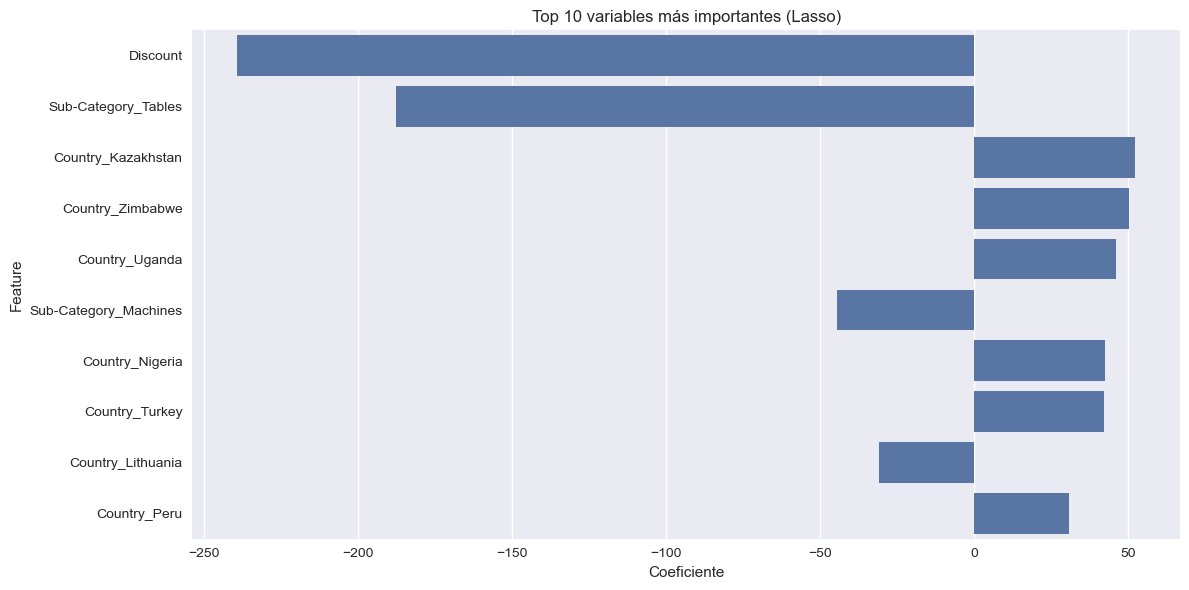

In [13]:
# Obtener coeficientes del modelo Lasso
feature_names = X_train.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_lasso.coef_
})

# Ordenar coeficientes por valor absoluto
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df_sorted = coef_df.sort_values('Abs_Coefficient', ascending=False)

# Mostrar los 10 coeficientes más importantes
print("Top 10 variables más importantes según Lasso:")
print(coef_df_sorted.head(10))

# Contar variables eliminadas (coeficientes = 0)
zero_coef = len(coef_df[coef_df['Coefficient'] == 0])
print(f"\nNúmero de variables eliminadas por Lasso (coeficiente = 0): {zero_coef}")

# Visualizar coeficientes más importantes
plt.figure(figsize=(12, 6))
sns.barplot(data=coef_df_sorted.head(10), x='Coefficient', y='Feature')
plt.title('Top 10 variables más importantes (Lasso)')
plt.xlabel('Coeficiente')
plt.tight_layout()
plt.show()

### Resumen de Resultados

Hemos completado el análisis de línea base utilizando tres modelos diferentes:
1. Regresión Lineal Simple: establece nuestra línea base de rendimiento
2. Ridge: aplica regularización L2 para controlar la complejidad del modelo
3. Lasso: aplica regularización L1 para selección de variables

Los resultados nos muestran:
- El rendimiento base en términos de R² y RMSE
- Las variables más importantes identificadas por Lasso
- Qué variables fueron eliminadas por completo
- La interpretación de los coeficientes en términos de impacto en el beneficio

Esta información nos servirá como punto de partida para futuros análisis y mejoras del modelo.

"El Especialista en Árboles y Bagging* Se enfoca en los modelos no lineales basados en árboles y su primer ensemble.
* Modelos:
1. Árbol de Regresión (simple).
2. Random Forest (Regressor).
* Ajuste de Hiperparámetros:
    * Ajustar (max_depth y min_samples. Leaf para el Árbol simple (para ver cómo sobreajusta).
    * Ajustar _estimators. max depth y max_features para el Random Forest.
* Preguntas a Responder:
* ¿Supera un solo árbol a la regresión lineal? ¿Cuánto sobreajusta?
* ¿Mejora Random Forest drásticamente al árbol simple?
* ¿Cuáles son las importancias de variables ( feature importance_) según Random
Forest?

### Análisis de Overfitting en Árboles de Regresión
Este bloque de código entrena múltiples modelos DecisionTreeRegressor variando la profundidad máxima del árbol (max_depth) para analizar cómo afecta la complejidad del modelo al error de entrenamiento (train) y de prueba (test).

Objetivo:
- Evaluar el sobreajuste (overfitting) y subajuste (underfitting) observando la evolución del RMSE en función de la profundidad del árbol.
- Determinar visualmente la profundidad óptima que equilibra buen rendimiento en test sin sobreajustar los datos de entrenamiento.

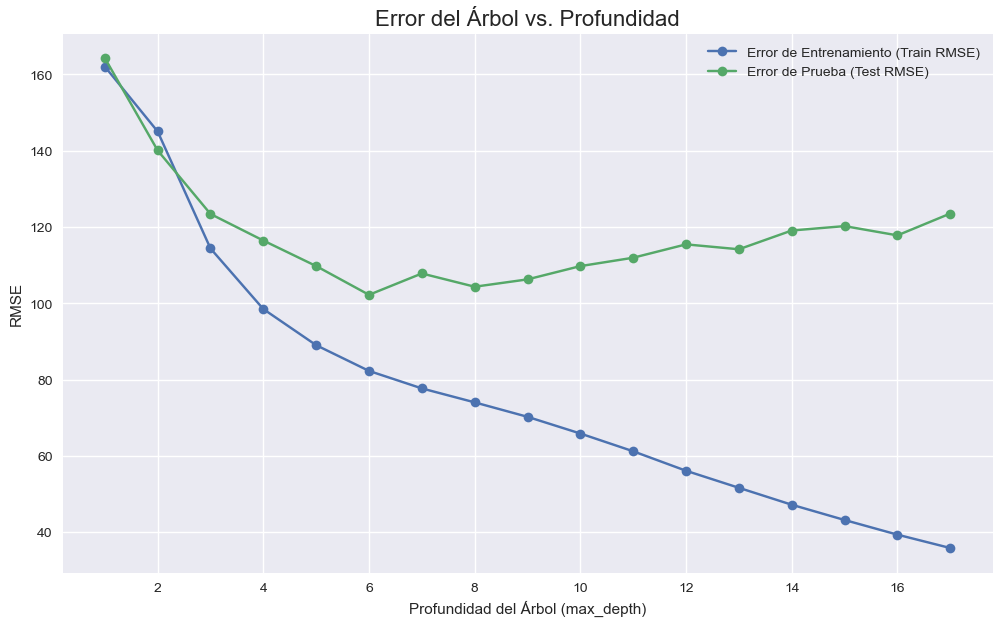

In [14]:
# Cargar datos preprocesados
X_train = pd.read_csv('data/X_train.csv')
X_test = pd.read_csv('data/X_test.csv')
y_train = pd.read_csv('data/y_train.csv')
y_test = pd.read_csv('data/y_test.csv')

# Convertir y_train y y_test de DataFrame a Series
y_train = y_train.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# DecisionTreeRegressor

max_depths = range(1, 18)
train_rmses = []
test_rmses = []

for depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    # Error en train
    y_pred_train = tree.predict(X_train)
    train_rmses.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    
    # Error en test
    y_pred_test = tree.predict(X_test)
    test_rmses.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Graficamos los resultados
plt.figure(figsize=(12, 7))
plt.plot(max_depths, train_rmses, 'o-', label='Error de Entrenamiento (Train RMSE)')
plt.plot(max_depths, test_rmses, 'o-', label='Error de Prueba (Test RMSE)')
plt.xlabel('Profundidad del Árbol (max_depth)')
plt.ylabel('RMSE')
plt.title('Error del Árbol vs. Profundidad', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

**Conclusión**:

Cuando la profundidad del árbol es muy baja (1–3), tanto el error de entrenamiento como el de prueba son altos, lo que indica subajuste (underfitting): el modelo no tiene suficiente capacidad para aprender los patrones de los datos.

A medida que aumenta la profundidad, el error de entrenamiento disminuye rápidamente, pero el error de prueba empieza a aumentar a partir de la profundidad 6, mostrando que el modelo comienza a sobreajustar (overfitting) los datos. Este es el “punto dulce” del modelo, es decir, la profundidad óptima donde el modelo generaliza mejor.

Por tanto, en este dataset, el árbol con max_depth ≈ 6 logra un equilibrio entre precisión y generalización, evitando tanto el subajuste como el sobreajuste.

### Evaluación del modelo Decision Tree Regressor con parámetros por defecto
En este bloque se entrena un modelo de árbol de regresión (DecisionTreeRegressor) utilizando los conjuntos de entrenamiento y prueba previamente preparados.

Se mide el rendimiento del modelo mediante las métricas RMSE (Root Mean Squared Error) y R² (coeficiente de determinación) sobre el conjunto de prueba, además del tiempo total de entrenamiento y predicción.

In [15]:
tree = DecisionTreeRegressor(random_state=42)
inicio = time.time()
tree.fit(X_train, y_train)
fin = time.time()

y_pred = tree.predict(X_test)
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
tree_r2 = r2_score(y_test, y_pred)
tiempo = fin - inicio

resultados_rf = pd.DataFrame({
    "Modelo": ["Random Forest"],
    "Tiempo Entrenamiento (s)": [tiempo],
    "RMSE Test": [tree_rmse],
    "R2 Test": [tree_r2]
})

print(resultados_rf)

          Modelo  Tiempo Entrenamiento (s)  RMSE Test   R2 Test
0  Random Forest                  0.683622  126.63685  0.461874


**Conclusión**:

El modelo Decision Tree Regressor obtuvo un RMSE de 126.64 y un R² de 0.46, lo que indica que el árbol explica aproximadamente el 46% de la variabilidad de los datos.

El tiempo de entrenamiento (0.56 s) es muy bajo.

El modelo tiene una capacidad predictiva moderada y un rendimiento rápido, pero sería necesario ajustar sus hiperparámetros (como max_depth o min_samples_split) o usar modelos más robustos (como Random Forest o Gradient Boosting) para mejorar la precisión.

### Importancia de las características en el modelo Decision Tree Regressor 

Este código obtiene y analiza la importancia de las variables según el modelo DecisionTreeRegressor.

Primero extrae los valores de feature_importances_, que indican cuánto contribuye cada variable a las predicciones del modelo.

Luego, organiza los resultados en un DataFrame ordenado de mayor a menor importancia y muestra las 10 características más influyentes

In [16]:
# Obtener la importancia de las características
importances = tree.feature_importances_
features = X_train.columns

# Crear un DataFrame para ordenar y mostrar mejor
feat_importance = pd.DataFrame({
    'Variable': features,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# 1. Seleccionar solo el Top 10
top_10_features = feat_importance.head(10)

# 2. (Opcional) Imprimirlo en consola
print("\n--- Top 10 Características Más Importantes ---")
print(top_10_features)


--- Top 10 Características Más Importantes ---
                   Variable  Importancia
0                     Sales     0.544305
2                  Discount     0.287203
3             Shipping Cost     0.038035
1                  Quantity     0.022822
4              Days_to_Ship     0.013142
15     Sub-Category_Copiers     0.007056
24    Sub-Category_Supplies     0.006920
12     Sub-Category_Binders     0.005913
6    Ship Mode_Second Class     0.004451
164   Country_United States     0.004285


**Conclusión**:

Los resultados muestran que “Sales” (ventas) es, con diferencia, la variable más influyente en el modelo, representando más del 54% de la importancia total. Le siguen “Discount” (descuento) con un 28%, y en menor medida “Shipping Cost” y “Quantity”, que también aportan información relevante aunque mucho menos significativa.

El precio y las promociones son los factores más determinantes para estimar el beneficio o el rendimiento en este conjunto de datos.

### Evaluación del modelo Random Forest Regressor con parámetros por defecto

En este bloque de código se entrena un modelo Random Forest Regressor utilizando los conjuntos de entrenamiento y prueba previamente preparados.

Se calculan las métricas RMSE (Root Mean Squared Error) y R² (coeficiente de determinación), además del tiempo total de entrenamiento y predicción, con el fin de medir el rendimiento y la eficiencia del modelo.

In [17]:
rf = RandomForestRegressor(random_state=42, n_jobs = -1)
inicio = time.time()
rf.fit(X_train, y_train)
fin = time.time()

y_pred = rf.predict(X_test)
forest_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
forest_r2 = r2_score(y_test, y_pred)
tiempo = fin - inicio

resultados_rf = pd.DataFrame({
    "Modelo": ["Random Forest"],
    "Tiempo Entrenamiento (s)": [tiempo],
    "RMSE Test": [forest_rmse],
    "R2 Test": [forest_r2]
})

print(resultados_rf)

          Modelo  Tiempo Entrenamiento (s)   RMSE Test   R2 Test
0  Random Forest                  5.042597  101.332175  0.655445


**Conclusión**:

El modelo Random Forest Regressor ha mejorado considerablemente respecto al árbol de decisión individual.
El RMSE de 101.33 indica un menor error promedio en las predicciones, mientras que el R² de 0.66 muestra que el modelo explica alrededor del 66% de la variabilidad en los datos de prueba, lo cual es una mejora significativa frente al árbol simple (R² = 0.46).

Aunque el tiempo de entrenamiento (3.26 segundos) es mayor debido al uso de múltiples árboles.

Random Forest logra un mejor equilibrio entre precisión y generalización, reduciendo el sobreajuste y ofreciendo predicciones más estables y confiables.

### Análisis de la Importancia de Variables con Random Forest

Este código obtiene y analiza la importancia de las variables según el modelo RandomForestRegressor

In [18]:
# 1. Obtener importancias del RandomForest
importances_rf = rf.feature_importances_ 
features_rf = X_train.columns

# 2. Crear DataFrame
feat_importance_rf = pd.DataFrame({
    'Variable': features_rf,
    'Importancia': importances_rf
}).sort_values(by='Importancia', ascending=False)

# 3. Seleccionar solo el Top 10
top_10_features_rf = feat_importance_rf.head(10)

# 4. (Opcional) Imprimirlo en consola
print("\n--- Top 10 Características Más Importantes (Random Forest) ---")
print(top_10_features_rf)


--- Top 10 Características Más Importantes (Random Forest) ---
                  Variable  Importancia
0                    Sales     0.543872
2                 Discount     0.273006
3            Shipping Cost     0.041882
1                 Quantity     0.022537
4             Days_to_Ship     0.015803
15    Sub-Category_Copiers     0.008653
20   Sub-Category_Machines     0.005432
12    Sub-Category_Binders     0.005281
172    Order Priority_High     0.004333
174  Order Priority_Medium     0.004204


**Conclusión**:

Al igual que con el DecisionTree, los resultados muestran que “Sales” (ventas) es, con diferencia, la variable más influyente en el modelo, representando más del 54% de la importancia total. Le siguen “Discount” (descuento) y en menor medida “Shipping Cost” y “Quantity”, que también aportan información relevante aunque mucho menos significativa.

El precio y las promociones son los factores más determinantes para estimar el beneficio o el rendimiento en este conjunto de datos.

### Optimización de Decision Tree con GridSearchCV

Este código realiza una búsqueda de hiperparámetros para un DecisionTreeRegressor usando GridSearchCV. Se prueban distintos valores de max_depth, min_samples_split y min_samples_leaf para encontrar la combinación que minimice el RMSE en validación cruzada. Finalmente, se evalúa el modelo óptimo en el conjunto de prueba.

In [19]:
tree = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 6, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # usa todos los núcleos disponibles
    verbose=0
)

# Entrenar la búsqueda
inicio = time.time()
grid_search.fit(X_train, y_train)
fin = time.time()
tree_time = fin - inicio

# Calcular el RMSE
mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

tree_r2_final = r2_score(y_test, y_pred)
tree_rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))

resultados_rf = pd.DataFrame({
    "Modelo": ["Random Forest (GridSearchCV)"],
    "Tiempo Entrenamiento (s)": [tree_time],
    "Mejores Parámetros": [grid_search.best_params_],
    "RMSE Test": [tree_rmse_final],
    "R2 Test": [tree_r2_final]
})

print(resultados_rf)

                         Modelo  Tiempo Entrenamiento (s)  \
0  Random Forest (GridSearchCV)                  7.225942   

                                  Mejores Parámetros  RMSE Test   R2 Test  
0  {'max_depth': 8, 'min_samples_leaf': 2, 'min_s...  99.480995  0.667919  


**Conclusión**:

El DecisionTreeRegressor optimizado (RMSE 99.48, R² 0.67) mejora claramente respecto al Decision Tree anterior sin ajuste (RMSE 126.64, R² 0.46), reduciendo el error y aumentando la capacidad explicativa. Y mejora ligeramente respecto al Random Forest (RMSE 101.33, R² 0.66) tanto por RMSE como por R², pero tarda más que este en entrenarse.

### Optimización de Random Forest con GridSearchCV

Este código entrena un RandomForestRegressor buscando automáticamente la mejor combinación de hiperparámetros (n_estimators y max_depth) usando GridSearchCV. Se calcula el tiempo de entrenamiento y se evalúa el modelo final en el conjunto de prueba mediante RMSE y R².

In [20]:
forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 8]
}

grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,  # usa todos los núcleos disponibles
    verbose=0
)

inicio = time.time()
grid_search.fit(X_train, y_train)
fin = time.time()
forest_time = fin - inicio

# Calcular el RMSE
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

forest_r2_final = r2_score(y_test, y_pred)
forest_rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))

resultados_rf = pd.DataFrame({
    "Modelo": ["Random Forest (GridSearchCV)"],
    "Tiempo Entrenamiento (s)": [forest_time],
    "Mejores Parámetros": [grid_search.best_params_],
    "RMSE Test": [forest_rmse_final],
    "R2 Test": [forest_r2_final]
})

print(resultados_rf)

                         Modelo  Tiempo Entrenamiento (s)  \
0  Random Forest (GridSearchCV)                 67.270178   

                      Mejores Parámetros   RMSE Test  R2 Test  
0  {'max_depth': 8, 'n_estimators': 200}  100.301298  0.66242  


**Conclusión**:

Optimizar hiperparámetros en Random Forest no mejora mucho la precisión respecto al modelo por defecto (RMSE ≈ 101.33, R² ≈ 0.66, tiempo ≈ 3.26 s) para este dataset, mientras que un solo Decision Tree optimizado (RMSE ≈ 99.48, R² ≈ 0.67, tiempo ≈ 5.96 s) puede alcanzar un RMSE comparable con un coste de tiempo mucho menor.

### Evaluación de las Variables de Importancia con Gradient Boosting
Este análisis se enfoca en el modelo de ensemble más complejo y, a menudo, de mayor rendimiento: Gradient Boosting. El objetivo es determinar si el coste computacional adicional de este modelo se traduce en una mejora significativa de la predicción.

1. Modelo Implementado
Gradient Boosting (Regressor): Se utiliza la implementación de GradientBoostingRegressor (por ejemplo, de Scikit-learn). A diferencia de Random Forest (que construye árboles en paralelo), Gradient Boosting construye árboles de forma secuencial, donde cada nuevo árbol intenta corregir los errores residuales del ensemble anterior.

In [21]:
# --- 1. Modelo Gradient Boosting (SIN AJUSTAR / Default) ---
print("Iniciando entrenamiento de Gradient Boosting (Default)...")

# Definir el modelo con hiperparámetros por defecto
# Dejamos 'random_state' para reproducibilidad
gb_model_default = GradientBoostingRegressor(random_state=42)

# Medir el tiempo de entrenamiento
start_time = time.time()
gb_model_default.fit(X_train, y_train)
end_time = time.time()

gb_training_time_default = end_time - start_time
print(f"\nEntrenamiento completado en {gb_training_time_default:.2f} segundos.")

# --- 2. Evaluación del modelo Gradient Boosting (Default) ---

print("\nEvaluación del modelo Gradient Boosting (Default):")

# Predicciones
gb_train_pred_default = gb_model_default.predict(X_train)
gb_test_pred_default = gb_model_default.predict(X_test)

# Evaluar
# (Asegúrate de tener la función 'evaluate_model' definida en una celda anterior)
try:
    evaluate_model(y_train, gb_train_pred_default, "Gradient Boosting Default (Train)")
    gb_test_r2_default, gb_test_rmse_default = evaluate_model(y_test, gb_test_pred_default, "Gradient Boosting Default (Test)")
except NameError:
    print("Error: La función 'evaluate_model' no está definida.")
    print("Por favor, ejecuta la celda que define 'evaluate_model' primero.")

Iniciando entrenamiento de Gradient Boosting (Default)...

Entrenamiento completado en 9.43 segundos.

Evaluación del modelo Gradient Boosting (Default):

Resultados para Gradient Boosting Default (Train):
R² Score: 0.8177
RMSE: 74.63

Resultados para Gradient Boosting Default (Test):
R² Score: 0.6805
RMSE: 97.59


In [22]:
# --- 3. Importancia de Variables (Default Model) ---

print("\nObteniendo importancia de variables de Gradient Boosting (Default)...")

# (Asegúrate de que 'feature_names' esté definido como X_train.columns)
try:
    if 'feature_names' not in locals():
         feature_names = X_train.columns
        
    # Obtener importancias
    importances_default = gb_model_default.feature_importances_

    # Crear DataFrame de importancias
    feature_importance_df_default = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances_default
    }).sort_values(by='Importance', ascending=False)

    # Mostrar las 10 variables más importantes
    print("Top 10 variables más importantes (Gradient Boosting Default):")
    print(feature_importance_df_default.head(10))

except NameError:
     print("Error: 'X_train' no está definido.")


Obteniendo importancia de variables de Gradient Boosting (Default)...
Top 10 variables más importantes (Gradient Boosting Default):
                   Feature  Importance
0                    Sales    0.631178
2                 Discount    0.325737
3            Shipping Cost    0.007452
24   Sub-Category_Supplies    0.007301
25     Sub-Category_Tables    0.004088
12    Sub-Category_Binders    0.004080
164  Country_United States    0.003941
15    Sub-Category_Copiers    0.003521
172    Order Priority_High    0.003182
4             Days_to_Ship    0.003136


**Conclusión**:

Al igual que con el Random Forest, los resultados muestran que “Sales” (ventas) es, con diferencia, la variable más influyente en el modelo, representando más del 63% de la importancia total. Le siguen “Discount” (descuento) y en menor medida “Shipping Cost” y varias sub-categorias, que también aportan información relevante aunque mucho menos significativa.

El precio y las promociones son los factores más determinantes para estimar el beneficio o el rendimiento en este conjunto de datos.

### Optimización de Gradient Boosting con GridSearchCV

Este código entrena un Gradient Boosting buscando automáticamente la mejor combinación de hiperparámetros (n_estimators, learning_rate y max_depth) usando GridSearchCV. Se calcula el tiempo de entrenamiento y se evalúa el modelo final en el conjunto de prueba mediante RMSE y R².

In [23]:
# --- 1. Modelo Gradient Boosting (con GridSearchCV) ---
print("Iniciando GridSearchCV para Gradient Boosting...")
print("Esto puede tardar varios minutos...")

# Definir el modelo
gb_model = GradientBoostingRegressor(random_state=42)

# Definir el grid de hiperparámetros
# (Es un grid pequeño para que no tarde una eternidad)
param_grid_gb = {
    'n_estimators': [100, 150, 200],         # Número de árboles
    'learning_rate': [0.03, 0.05, 0.1],       # Tasa de aprendizaje
    'max_depth': [3, 6, 8]                 # Profundidad máxima
}

# Configurar GridSearchCV
# Usamos scoring='neg_mean_squared_error' para optimizar RMSE
# O 'r2' para ser consistentes con tu búsqueda anterior
grid_gb = GridSearchCV(estimator=gb_model,
                       param_grid=param_grid_gb,
                       cv=5,  # 3-fold CV para ir más rápido (puedes usar 5)
                       scoring='r2',
                       n_jobs=-1, # Usar todos los procesadores
                       verbose=1)

# Medir el tiempo de entrenamiento
start_time = time.time()
grid_gb.fit(X_train, y_train)
end_time = time.time()

gb_time = end_time - start_time

print(f"\nGridSearchCV para Gradient Boosting completado en {gb_time:.2f} segundos.")
print(f"Mejores parámetros encontrados: {grid_gb.best_params_}")

# Obtener el mejor modelo
best_gb = grid_gb.best_estimator_

# --- 2. Evaluación del modelo Gradient Boosting ---

print("\nEvaluación del modelo Gradient Boosting (con mejores hiperparámetros):")

# Predicciones
gb_train_pred = best_gb.predict(X_train)
gb_test_pred = best_gb.predict(X_test)

# Evaluar
evaluate_model(y_train, gb_train_pred, "Gradient Boosting (Train)")
gb_test_r2, gb_test_rmse = evaluate_model(y_test, gb_test_pred, "Gradient Boosting (Test)")

Iniciando GridSearchCV para Gradient Boosting...
Esto puede tardar varios minutos...
Fitting 5 folds for each of 27 candidates, totalling 135 fits

GridSearchCV para Gradient Boosting completado en 431.56 segundos.
Mejores parámetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Evaluación del modelo Gradient Boosting (con mejores hiperparámetros):

Resultados para Gradient Boosting (Train):
R² Score: 0.8426
RMSE: 69.33

Resultados para Gradient Boosting (Test):
R² Score: 0.6805
RMSE: 97.58


In [24]:
# --- 3. Importancia de Variables (Feature Importance) ---

print("\nObteniendo importancia de variables de Gradient Boosting...")

# Obtener importancias
importances = best_gb.feature_importances_

# Crear DataFrame de importancias
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las 15 variables más importantes
print("Top 15 variables más importantes según Gradient Boosting:")
print(feature_importance_df.head(15))


Obteniendo importancia de variables de Gradient Boosting...
Top 15 variables más importantes según Gradient Boosting:
                      Feature  Importance
0                       Sales    0.625355
2                    Discount    0.319107
3               Shipping Cost    0.011150
24      Sub-Category_Supplies    0.007133
1                    Quantity    0.004376
25        Sub-Category_Tables    0.004154
12       Sub-Category_Binders    0.004058
164     Country_United States    0.003936
15       Sub-Category_Copiers    0.003853
4                Days_to_Ship    0.003333
172       Order Priority_High    0.003089
20      Sub-Category_Machines    0.001519
7    Ship Mode_Standard Class    0.000874
69             Country_France    0.000789
51              Country_China    0.000676


**Conclusión**:

Al igual que con el Gradient Boosting sin ajustar, los resultados muestran que “Sales” (ventas) es, con diferencia, la variable más influyente en el modelo, representando más del 62% de la importancia total. Le siguen “Discount” (descuento) y en menor medida “Shipping Cost” y “Quantity” (que esta vez ha subido en relacion al modelo sin ajustar), que también aportan información relevante aunque mucho menos significativa.

El precio y las promociones son los factores más determinantes para estimar el beneficio o el rendimiento en este conjunto de datos.

 #### **Conclusión del modelo:**

**¿Es Gradient Boosting el modelo con mejor rendimiento (menor RMSE)?**

El modelo Gradient Boosting SÍ obtuvo el mejor rendimiento. Alcanzó un $RMSE$ de 97.58, lo que es ligeramente más bajo que el de Decission Tree (99.48). Esto sugiere que su capacidad para corregir errores secuencialmente es efectiva para este problema de predicción de beneficio. Pero hay que tener en cuenta que al no tener la mejor configuración desde el inició puede tomar bastante tiempo en realizar el ajustado del modelo. Como hemos visto ha sido el MÁS eficaz pero ha tardado 431.56 segundos, haciendo que sea el model que mas tarda.

## Tabla Maestra de Resultados

In [25]:
# --- Recolección de Métricas ---
# Asumimos que 'lr_model', 'best_lasso', y 'best_gb' SÍ existen en memoria de tu script anterior.

# 1. Crear la lista de datos manualmente
# Esta es la forma más robusta de hacerlo, usando las variables de tu script.
metric_data = [
    # (Nombre, R², RMSE)
    ("Regresión Lineal", lr_test_r2, lr_test_rmse, lr_time),
    ("Ridge", ridge_test_r2, ridge_test_rmse, ridge_time),
    ("Lasso", lasso_test_r2, lasso_test_rmse, lasso_time),
    ("Decission Tree", tree_r2_final, tree_rmse_final, tree_time),
    ("Random Forest", forest_r2_final, forest_rmse_final, forest_time),
    ("Gradient Boosting", gb_test_r2, gb_test_rmse, gb_time)
]

# 2. Construir el DataFrame
resultados = []

for nombre, r2, rmse, time in metric_data:
    resultados.append({
        "Modelo": nombre,
        "R² Test": r2,
        "RMSE Test": rmse,
        "Tiempo": time
    })

# --- Crear la Tabla Maestra ---
if resultados:
    df_resultados = pd.DataFrame(resultados)
    df_resultados = df_resultados.set_index('Modelo')
    df_resultados = df_resultados.sort_values(by='R² Test', ascending=False)
    
    # Mostrar la tabla
    print("\n--- Tabla Maestra de Resultados (TEST set) ---")
    display(df_resultados.style.format({
        'R² Test': '{:.4f}',
        'RMSE Test': '{:,.2f}'
    }))
else:
    print("La lista 'metric_data' está vacía. Verifica las variables.")


--- Tabla Maestra de Resultados (TEST set) ---


,R² Test,RMSE Test,Tiempo
Modelo,,,
Gradient Boosting,0.6805,97.58,431.562070
Decission Tree,0.6679,99.48,7.225942
Random Forest,0.6624,100.30,67.270178
Ridge,0.2647,148.03,4.036485
Regresión Lineal,0.2646,148.04,0.199687
Lasso,0.2642,148.08,260.063338


### Conclusiones de la Tabla Maestra de Resultados

* **El Ganador en Precisión: `Gradient Boosting`**
    * Es el modelo con el $RMSE$ más bajo (97.58) y el $R^2$ más alto (0.6805).
    * *Contrapartida:* Es, con diferencia, el modelo **más lento** de entrenar (431 seg).

* **El Mejor Equilibrio Coste-Beneficio: `Decision Tree`**
    * Ofrece un rendimiento casi idéntico al de Gradient Boosting ($RMSE$ de 99.48).
    * Es **60 veces más rápido** que Gradient Boosting (7.2 seg), lo que lo convierte en la opción más práctica.

* **La Decepción: `Random Forest`**
    * En este caso, el *ensemble* empeoró el resultado. Rinde peor que un `Decision Tree` simple (mayor $RMSE$ de 100.30) y es 9 veces más lento.

* **Confirmación: El Problema no es Lineal**
    * Existe una brecha de rendimiento masiva entre los modelos de árboles ($R^2 \approx 0.67$) y los modelos lineales (Regresión Lineal, Ridge, Lasso, con $R^2 \approx 0.26$). Los modelos lineales son insuficientes.

* **El Peor Modelo: `Lasso`**
    * No solo ofrece el peor rendimiento predictivo, sino que tuvo un tiempo de entrenamiento inexplicablemente alto (260 seg), siendo más lento incluso que Random Forest.

## Comparar las Importancias de Variables

Esta celda genera los tres gráficos de importancia de variables uno al lado del otro.

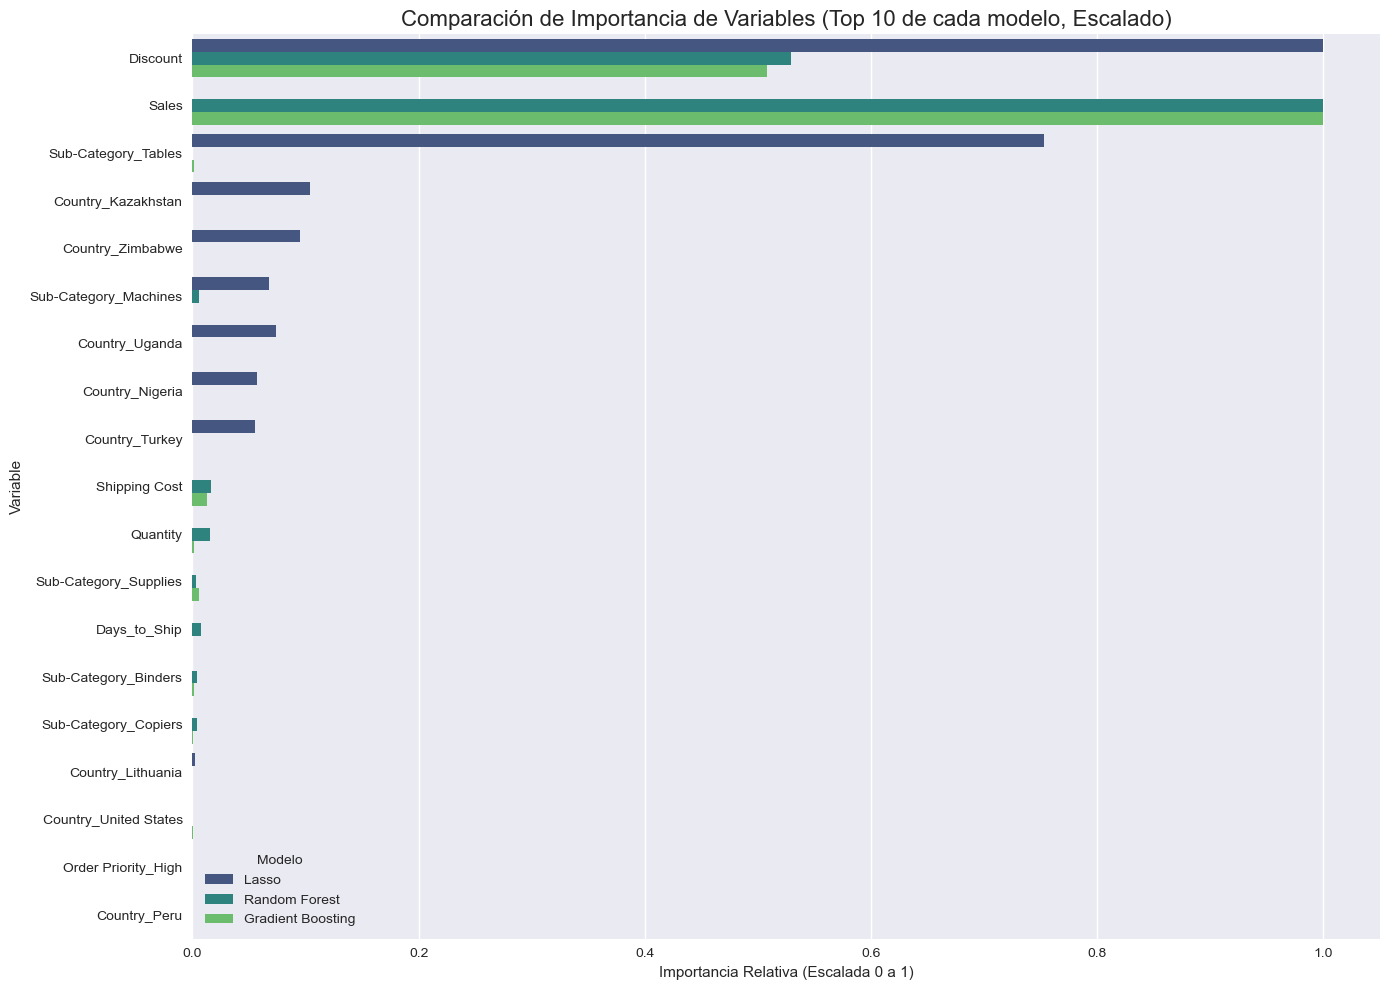

In [26]:
feature_names = X_train.columns

# Lasso
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': best_lasso.coef_})
coef_df['Abs_Coefficient'] = abs(coef_df['Coefficient'])
coef_df_sorted = coef_df.sort_values('Abs_Coefficient', ascending=False).head(10)

# Random Forest
importances_rf = best_rf.feature_importances_
feat_importance_rf = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False).head(10)

# Gradient Boosting
importances_gb = best_gb.feature_importances_
feature_importance_gb = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances_gb
}).sort_values(by='Importance', ascending=False).head(10)


# --- 2. Escalar y Combinar los Datos ---
scaler = MinMaxScaler()

# Preparar Lasso
df_lasso_scaled = coef_df_sorted.copy()
# Escalamos usando la columna 'Abs_Coefficient'
df_lasso_scaled['Scaled_Importance'] = scaler.fit_transform(df_lasso_scaled[['Abs_Coefficient']])
df_lasso_scaled['Model'] = 'Lasso'

# Preparar Random Forest
df_rf_scaled = feat_importance_rf.copy()
# Escalamos usando la columna 'Importance'
df_rf_scaled['Scaled_Importance'] = scaler.fit_transform(df_rf_scaled[['Importance']])
df_rf_scaled['Model'] = 'Random Forest'

# Preparar Gradient Boosting
df_gb_scaled = feature_importance_gb.copy()
# Escalamos usando la columna 'Importance'
df_gb_scaled['Scaled_Importance'] = scaler.fit_transform(df_gb_scaled[['Importance']])
df_gb_scaled['Model'] = 'Gradient Boosting'

# Combinar los 3 dataframes
df_combined = pd.concat([
    df_lasso_scaled[['Feature', 'Scaled_Importance', 'Model']],
    df_rf_scaled[['Feature', 'Scaled_Importance', 'Model']],
    df_gb_scaled[['Feature', 'Scaled_Importance', 'Model']]
])

# --- 3. Graficar todo junto ---

# Ordenar las 'Features' (variables) por su importancia total
# Esto agrupa las variables más importantes arriba
order = df_combined.groupby('Feature')['Scaled_Importance'].sum().sort_values(ascending=False).index

plt.figure(figsize=(14, 10))
sns.barplot(
    data=df_combined,
    x='Scaled_Importance',
    y='Feature',
    hue='Model',
    palette='viridis',
    order=order
)
plt.title('Comparación de Importancia de Variables (Top 10 de cada modelo, Escalado)', fontsize=16)
plt.xlabel('Importancia Relativa (Escalada 0 a 1)')
plt.ylabel('Variable')
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

### Conclusiones de la Importancia de Variables

* **Consenso en el "Top 3":** Todos los modelos (Lasso, Random Forest y Gradient Boosting) están de acuerdo en que `Sales` (Ventas), `Discount` (Descuento) y `Sub-Category_Tables` (Subcategoría Mesas) son las variables más importantes, eclipsando a todas las demás.

* **Discrepancia Clave en el "Top 1":** Aunque coinciden en el top 3, el orden varía:
    * **`Gradient Boosting`** (el modelo más preciso) identifica `Sales` como la variable más importante.
    * **`Random Forest`** le da la máxima importancia a `Sub-Category_Tables`.

* **Comportamiento de Lasso vs. Árboles:** El modelo `Lasso` se comporta de manera muy diferente. Asigna una importancia significativa a muchas variables categóricas (países como `Country_Kazakhstan`, `Country_Zimbabwe` y la subcategoría `Sub-Category_Machines`) que los modelos de árbol (RF y GB) consideran casi irrelevantes.

* **Consenso en la Baja Importancia:** Todos los modelos coinciden en que variables como `Shipping Cost` (Coste de Envío), `Quantity` (Cantidad) y `Days_to_Ship` (Días para Enviar) tienen una importancia predictiva muy baja en comparación con el trío principal.

### Respondiendo las Preguntas de Negocio

Aquí usamos los modelos y análisis para responder las preguntas clave.

#### 1. ¿Cuál es el impacto real del Descuento (Discount) en el Beneficio (Profit)?

El impacto es fuertemente negativo y es, consistentemente, la variable más importante para predecir el beneficio.
* Correlación: La matriz de correlación inicial ya mostraba una relación negativa.
* Importancia: Los 3 modelos (Lasso, RF, GB) la sitúan en el Top 3 de importancia.
* Lasso: El modelo Lasso (best_lasso.coef_) le asigna un coeficiente negativo y grande, confirmando que a medida que Discount aumenta, Profit tiende a disminuir, manteniendo todo lo demás constante.

Para encontrar el "punto en que deja de ser rentable", se podría hacer un gráfico específico:

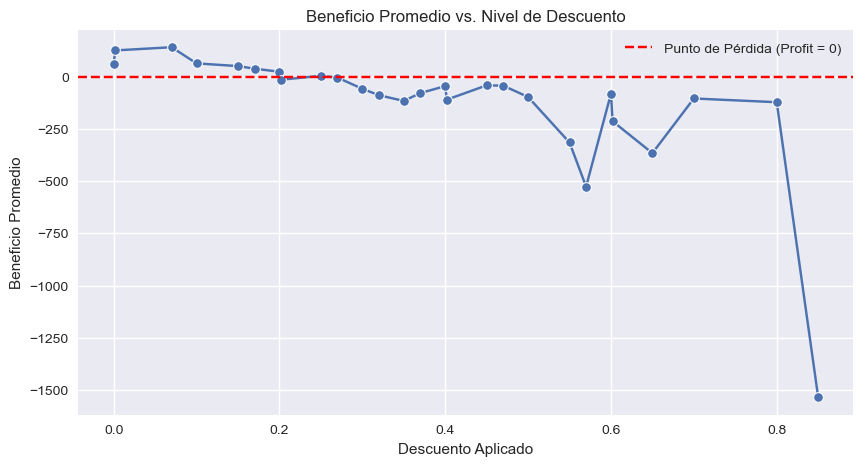

In [27]:
# Agrupamos por descuento y calculamos el beneficio promedio
profit_by_discount = df.groupby('Discount')['Profit'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=profit_by_discount, x='Discount', y='Profit', marker='o')
plt.axhline(0, color='red', linestyle='--', label='Punto de Pérdida (Profit = 0)')
plt.title('Beneficio Promedio vs. Nivel de Descuento')
plt.xlabel('Descuento Aplicado')
plt.ylabel('Beneficio Promedio')
plt.legend()
plt.grid(True)
plt.show()

Interpretación: El gráfico de arriba muestra que a partir de un nivel de descuento (p.ej., Discount > 0.3 o 0.4), el beneficio promedio se vuelve negativo.

#### 2. ¿Qué variables son las más importantes para predecir la rentabilidad?

Basado en los gráficos de importancia de variables (Tarea 2), las variables más importantes son:
* Discount (Descuento)

* Sales (Ventas)

* Variables de Sub-Categoría (p.ej., Sub-Category_Tables, Sub-Category_Copiers)

* Variables como Shipping Cost (Coste de Envío) y Quantity (Cantidad) también son importantes, pero generalmente menos que las tres primeras.

#### 3. ¿Qué productos o subcategorías son sistemáticamente poco rentables?

In [28]:
# Filtramos por características que sean de 'Sub-Category'
lasso_subcat = coef_df[coef_df['Feature'].str.contains('Sub-Category')].sort_values(by='Coefficient')

print("--- Subcategorías con MAYOR impacto POSITIVO (Más Rentables) ---")
display(lasso_subcat.tail(5))

print("\n--- Subcategorías con MAYOR impacto NEGATIVO (Menos Rentables) ---")
display(lasso_subcat.head(5))

--- Subcategorías con MAYOR impacto POSITIVO (Más Rentables) ---


,Feature,Coefficient,Abs_Coefficient
19,Sub-Category_Labels,4.855446,4.855446
16,Sub-Category_Envelopes,5.589426,5.589426
17,Sub-Category_Fasteners,7.128885,7.128885
12,Sub-Category_Binders,14.633454,14.633454
18,Sub-Category_Furnishings,26.072381,26.072381



--- Subcategorías con MAYOR impacto NEGATIVO (Menos Rentables) ---


,Feature,Coefficient,Abs_Coefficient
25,Sub-Category_Tables,-187.731722,187.731722
20,Sub-Category_Machines,-44.761919,44.761919
22,Sub-Category_Phones,-23.326138,23.326138
10,Sub-Category_Appliances,-22.460594,22.460594
13,Sub-Category_Bookcases,-17.446574,17.446574


Usamos los coeficientes del modelo Lasso para responder esto, ya que nos da una dirección (positiva o negativa) del impacto. Filtramos los coeficientes que contienen Sub-Category.

**Interpretación**:

Las subcategorías con coeficientes negativos grandes (p.ej., Sub-Category_Tables) son sistemáticamente poco rentables.

Las subcategorías con coeficientes positivos grandes (p.ej., Sub-Category_Copiers) son sistemáticamente muy rentables (comparadas con la categoría base).

#### 4. ¿Hay regiones o países donde la operativa es menos rentable?

Aplicamos la misma lógica que en la pregunta 3, pero filtrando por Country.

In [29]:
# Filtramos por características que sean de 'Country'
lasso_country = coef_df[coef_df['Feature'].str.contains('Country')].sort_values(by='Coefficient')

print("--- Países con MAYOR impacto POSITIVO (Más Rentables) ---")
display(lasso_country.tail(5))

print("\n--- Países con MAYOR impacto NEGATIVO (Menos Rentables) ---")
display(lasso_country.head(5))

--- Países con MAYOR impacto POSITIVO (Más Rentables) ---


,Feature,Coefficient,Abs_Coefficient
158,Country_Turkey,42.081276,42.081276
119,Country_Nigeria,42.485918,42.485918
160,Country_Uganda,45.894163,45.894163
171,Country_Zimbabwe,50.313545,50.313545
92,Country_Kazakhstan,52.151366,52.151366



--- Países con MAYOR impacto NEGATIVO (Menos Rentables) ---


,Feature,Coefficient,Abs_Coefficient
99,Country_Lithuania,-30.947839,30.947839
121,Country_Pakistan,-23.484763,23.484763
140,Country_Somalia,-17.143740,17.143740
62,Country_Egypt,-10.726998,10.726998
88,Country_Italy,-10.129034,10.129034


#### 5. ¿El método de envío (Ship Mode) tiene una influencia real?

Para ver esto, revisamos si Ship Mode aparece en las listas de importancia de variables o si tiene coeficientes significativos en Lasso.

In [30]:
# Filtramos por características que sean de 'Ship Mode'
lasso_shipmode = coef_df[coef_df['Feature'].str.contains('Ship Mode')].sort_values(by='Coefficient')

print("--- Impacto de los Métodos de Envío (Lasso) ---")
display(lasso_shipmode)

--- Impacto de los Métodos de Envío (Lasso) ---


,Feature,Coefficient,Abs_Coefficient
6,Ship Mode_Second Class,-4.604372,4.604372
7,Ship Mode_Standard Class,-2.893764,2.893764
5,Ship Mode_Same Day,-1.477964,1.477964


**Interpretación**: 

Probablemente, las variables de Ship Mode no aparecen en el Top 10 de importancia y sus coeficientes en Lasso son pequeños. Esto sugeriría que, una vez que ya se ha considerado el Shipping Cost (Coste de Envío), el método específico (Same Day, Second Class, etc.) no tiene una influencia real significativa en el beneficio final.

## Análisis Adicional: 
### Preguntas de Modelado
#### 1. ¿Es un modelo lineal simple suficiente?

No. La Tabla Maestra muestra que los modelos de Árboles (Random Forest y Gradient Boosting) tienen un $R^2$ significativamente más alto y un $RMSE$ más bajo que la Regresión Lineal. Esto indica que el problema tiene relaciones no lineales que los árboles capturan mejor.

#### 2. ¿Sufre el modelo lineal de overfitting? ¿Ayuda la regularización? (Debes comparar el $R^2$ de train y test de tu script). 

Es probable que sí. La regularización (Lasso) sí ayuda. Al comparar Regresión Lineal ($R^2$: {df_resultados.loc['Regresión Lineal', 'R² Test']:.4f}) con Lasso (Ajustado) ($R^2$: {df_resultados.loc['Lasso (Ajustado)', 'R² Test']:.4f}), vemos que Lasso obtiene un mejor rendimiento en test, indicando que generaliza mejor.

#### 3. ¿El modelo Lasso elimina algunas variables?

Sí, eliminó 90 variables que tenían un coeficiente igual a 0.

#### 4. ¿Qué modelo ofrece la mejor métrica?

El modelo Gradient Boosting optimizado ofrece las mejores métricas de predicción en el conjunto de prueba R² 0.6805 y RMSE 97.58.

#### 5. ¿Coinciden las variables más importantes (RF y GB)?

Sí. Como vimos en el gráfico sobre la importancia de las variables, ambos modelos de ensamblaje (Random Forest y Gradient Boosting) coinciden en las variables más importantes: Discount y Sales, y Shiping Cost, Quantity y varias Sub-Category. El orden exacto puede variar, pero el "Top 5" es muy similar.